In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


### seed 설정
- NumPy의 무작위 작업에 대한 전역 제어를 위해 np.random.seed를 설정.
- np.random.seed(123)를 설정해도 스크립트를 실행할 때마다 정확히 동일한 학습 평가데이터 분할이 재현되도록 보장하려는 경우 train_test_split과 같은 scikit-learn 함수에 random_state를 지정.
- TensorFlow를 사용하는 경우 TensorFlow 작업에 tf.random.set_seed를 사용하며 신경망 레이어의 무작위 가중치 초기화, 훈련 프로세스의 임의성(예: , 이 특정 코드에 없는 드롭아웃 레이어를 사용하는 경우) 또는 임의성을 포함하는 기타 TensorFlow 작업을 사용하는 경우에 적용. 단순한 모델이나 특정 데이터 세트에 대해 훈련된 모델은 다양한 초기화에서 성능에 큰 변화를 나타내지 않을 수 있다
- Python 내장 random 모듈이 스크립트의 어느 곳에서나 사용되는 경우 해당 모듈의 시드를 설정. TensorFlow 작업 자체에 'python_random.seed(123)'를 직접 사용할 필요가 없지만 스크립트 시작 부분에 python_random.seed(123)를 설정하면 난수 생성을 위해 내장된 python random 모듈을 사용하는 모든 Python 작업에 영향을 미칠 수 있다.

Q. wine.csv로 와의 품종을 예측하는 모델을 텐서플로/케라스로 아래와 같이 생성하고 학습 및 평가를 수행하세요.
- 입력층 :  Input 레이어 shape=(12,)
- 첫번째층 : 30, activation='relu'
- 두번째층 :12, activation='relu'
- 세번째층 :8, activation='relu'
- 출력층 :1, activation='sigmoid'

## 와인의 종류 예측하기

- 속성 12개 : 주석산 농도, 아세트산 농도, 구연산 농도, 잔류 당분 농도, 염화나트륨 농도, 유리 아황산 농도, 총 아황산 농도, 밀도, pH, 황산칼륨 농도, 알코올 도수, 와인의 맛(0~10등급), 클래스(1:레드 와인, 0: 화이트 와인)

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense , Input
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
import random as python_random


tf.random.set_seed(123)
np.random.seed(123)
python_random.seed(123)

# 데이터를 입력

df = pd.read_csv('/content/drive/MyDrive/kdt_240424/M6_딥러닝/dataset/wine.csv', header=None)

df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1


In [ ]:
X = df.drop('Class', axis=1)
y = df['Class']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=123)

model = Sequential()
model.add(Input(shape=(12,)))
model.add(Dense(30, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=100, batch_size=32)

test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)

KeyError: "['Class'] not found in axis"

In [ ]:
# EX

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense , Input
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
import random as python_random

# 와인의 속성을 X로 와인의 분류를 y로 저장
X = df.iloc[:,0:12]
y = df.iloc[:,12]

# 학습셋과 테스트셋으로 나눔
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=0)

model = Sequential()

model.add(Input(shape=(12,)))
model.add(Dense(30, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=100, batch_size=500, verbose=0) # 검증셋 0.8 x 0.25 = 0.2

test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)



41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9638 - loss: 0.0933
Test accuracy: 0.9646154046058655


In [ ]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_16 (Dense)                     │ (None, 30)                  │             390 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 12)                  │             372 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_18 (Dense)                     │ (None, 8)                   │             104 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,627 (10.27 KB)

 Trainable params: 875 (3.42 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,752 (6.85 KB)

.keras 파일
- 기본적으로 TensorFlow의 SavedModel 형식을 따릅니다. 이는 TensorFlow의 공식 모델 저장 형식으로, 모델 아키텍처, 가중치, 그리고 훈련 구성(옵티마이저 상태 등)을 포함할 수 있습니다.

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint
# 모델 저장의 조건을 설정

modelpath='/content/drive/MyDrive/kdt_240424/M6_딥러닝/dataset/model/all/{epoch:02d}-{val_accuracy:.4f}.keras'
checkpointer = ModelCheckpoint(filepath=modelpath, verbose=1)

# 모델 실행
history=model.fit(X_train, y_train, epochs=50, batch_size=500, validation_split=0.25, verbose=0, callbacks=[checkpointer])


Epoch 1: saving model to /content/drive/MyDrive/kdt_240424/M6_딥러닝/dataset/model/all/01-0.9838.keras

Epoch 2: saving model to /content/drive/MyDrive/kdt_240424/M6_딥러닝/dataset/model/all/02-0.9838.keras

Epoch 3: saving model to /content/drive/MyDrive/kdt_240424/M6_딥러닝/dataset/model/all/03-0.9838.keras

Epoch 4: saving model to /content/drive/MyDrive/kdt_240424/M6_딥러닝/dataset/model/all/04-0.9838.keras

Epoch 5: saving model to /content/drive/MyDrive/kdt_240424/M6_딥러닝/dataset/model/all/05-0.9838.keras

Epoch 6: saving model to /content/drive/MyDrive/kdt_240424/M6_딥러닝/dataset/model/all/06-0.9838.keras

Epoch 7: saving model to /content/drive/MyDrive/kdt_240424/M6_딥러닝/dataset/model/all/07-0.9838.keras

Epoch 8: saving model to /content/drive/MyDrive/kdt_240424/M6_딥러닝/dataset/model/all/08-0.9838.keras

Epoch 9: saving model to /content/drive/MyDrive/kdt_240424/M6_딥러닝/dataset/model/all/09-0.9838.keras

Epoch 10: saving model to /content/drive/MyDr

In [ ]:
# 데스트 결과 출력
score=model.evaluate(X_test, y_test)
print('Test accuracy:', score[1])

41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9781 - loss: 0.0714 
Test accuracy: 0.9792307615280151


History 객체

- 신경망 훈련을 위해 Keras 또는 TensorFlow 사용 시 model.fit()과 같은 호출로 훈련 작업을 실행하면 History 객체가 반환. 이 객체에는 연속적인 에포크의 훈련 손실 값과 측정항목 값 기록뿐만 아니라 해당하는 경우 검증 손실 값과 검증 측정항목 값도 포함.
- 코드에서 얻은 History 객체의 내용을 보려면 훈련 과정 중에 기록된 측정항목이 포함된 사전인 history 속성에 액세스. 'history.history' 사전의 각 키는 훈련 중에 모니터링된 측정항목에 해당

In [ ]:
# 그래프 확인을 위한 긴 학습 (컴퓨터 환경에 따라 시간이 다소 걸림)
history=model.fit(X_train, y_train, epochs=1000, batch_size=500, verbose=0, validation_split=0.25)

In [ ]:
print(history.history.keys())

print(history.history['loss'])
print(history.history['val_loss'])

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])
[0.0534580759704113, 0.053418178111314774, 0.053438130766153336, 0.05342856049537659, 0.05339701473712921, 0.05333928391337395, 0.05334051698446274, 0.05333460867404938, 0.05330630764365196, 0.053318217396736145, 0.0532786101102829, 0.05327163636684418, 0.0532548651099205, 0.05322929471731186, 0.05321779102087021, 0.05323038995265961, 0.05321219190955162, 0.053169697523117065, 0.05321503430604935, 0.053228605538606644, 0.05330389365553856, 0.05322879180312157, 0.053448181599378586, 0.05358463525772095, 0.05375159904360771, 0.05366310477256775, 0.05375794321298599, 0.05380687117576599, 0.05386693403124809, 0.0537797249853611, 0.05372082442045212, 0.05363950505852699, 0.05346972495317459, 0.05334626883268356, 0.053302038460969925, 0.05317682400345802, 0.05303734168410301, 0.05298405513167381, 0.05276584252715111, 0.05268240347504616, 0.05258503928780556, 0.05250486359000206, 0.05247648060321808, 0.05243896320462227, 0.0523580126

In [ ]:
# history에 저장된 학습 결과를 확인

hist_df=pd.DataFrame(history.history)
hist_df.head()

,accuracy,loss,val_accuracy,val_loss
0,0.984347,0.053458,0.984615,0.056043
1,0.984090,0.053418,0.984615,0.056128
2,0.984347,0.053438,0.984615,0.056123
3,0.984347,0.053429,0.984615,0.056055
4,0.984347,0.053397,0.984615,0.056078


In [ ]:
hist_df.shape

(1000, 4)

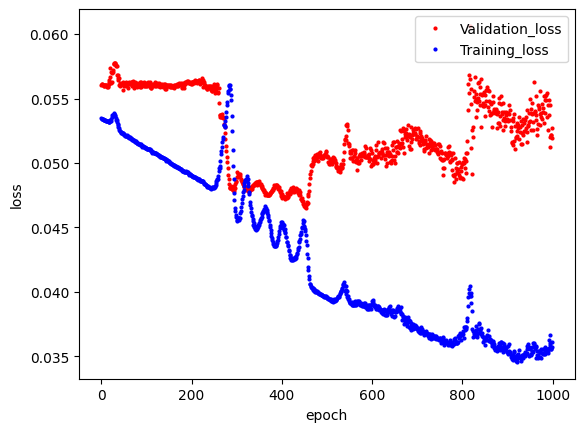

In [ ]:
import matplotlib.pyplot as plt

# y_vloss에 테스트셋(여기서는 검증셋)의 오차를 저장
y_vloss = hist_df['val_loss']

# y_loss에 학습셋의 오차를 저장
y_loss=hist_df['loss']

# x값을 지정하고 테스트셋(검증셋)의 오차를 빨간색으로, 학습셋의 오차를 파란색으로 표시
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, 'o', c='red', markersize=2, label='Validation_loss')
plt.plot(x_len, y_loss, 'o', c='blue', markersize=2, label='Training_loss')


plt.legend(loc='upper right')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

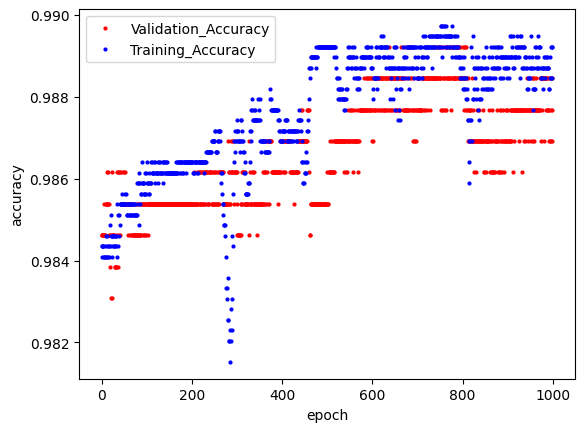

In [ ]:
# history 객체에서 학습셋과 검증셋의 정확도를 가져옴
# 'acc' 대신 'accuracy' 를 사용해야 할 수도 있다. 이는 keras 버전에 따라 다름
y_acc = history.history['accuracy'] # acc대신 accuracy를 사용하는 경우
y_val_acc = history.history['val_accuracy'] # 마찬가지로 val_accuracy를 사용

# x 값을 저장
x_len = np.arange(len(y_acc))

# 검증셋의 정확도를 빨간색으로, 학습셋의 정확도를 파란색으로 표시
plt.plot(x_len, y_val_acc, 'o', c='red', markersize=2, label='Validation_Accuracy')
plt.plot(x_len, y_acc, 'o', c='blue', markersize=2, label='Training_Accuracy')

# 범례와 축 라벨을 추가
plt.legend(loc='upper left')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
import os
import pandas as pd
import random as python_random

np.random.seed(123)  # Numpy module.
python_random.seed(123)  # Python random module.
tf.random.set_seed(123)  # TensorFlow module.

# 데이터를 입력합니다.
df = pd.read_csv('/content/drive/MyDrive/kdt_240424/M6_딥러닝/dataset/wine.csv', header=None)

# 와인의 속성을 X로 와인의 분류를 y로 저장합니다.
X = df.iloc[:,0:12]
y = df.iloc[:,12]

#학습셋과 테스트셋으로 나눕니다.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=0)

# 모델 구조를 설정합니다.
model = Sequential()
model.add(Input(shape=(12,)))
model.add(Dense(12, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

#모델을 컴파일합니다.
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_20 (Dense)                     │ (None, 12)                  │             156 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_21 (Dense)                     │ (None, 8)                   │             104 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_22 (Dense)                     │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 269 (1.05 KB)

 Trainable params: 269 (1.05 KB)

 Non-trainable params: 0 (0.00 B)

[ callback ]

callbacks=[early_stopping_callback, checkpointer]

학습 과정 중에 특정 이벤트가 발생했을 때, 취할 행동을 정의.

- early_stopping_callback: 이 콜백은 모델의 성능이 더 이상 개선되지 않을 때 학습을 조기에 중단하도록 설정. 예를 들어, 검증 데이터에 대한 손실이 일정 기간 동안 개선되지 않으면 학습을 멈춘다. 이는 과적합을 방지하고 학습 시간을 단축시키는 데 도움이 된다.
- checkpointer: 이 콜백은 모델의 중간 학습 상태를 파일로 저장하여, 학습 과정에서 가장 좋은 모델을 보존할 수 있게 한다. 이를 통해 나중에 모델을 재사용하거나, 학습 과정이 끝난 후 최적의 모델 상태로 복원할 수 있다.

이 코드는 신경망 모델의 학습 과정을 세밀하게 제어하면서, 과적합을 방지하고, 학습 과정에서 모델의 최적 상태를 저장하는 방법을 보여준다.

In [ ]:
# 학습이 언제 자동 중단 될지를 설정
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=30)

# 최적화 모델이 저장될 폴더와 모델의 이름을 정함
modelpath='/content/drive/MyDrive/kdt_240424/M6_딥러닝/dataset/model/bestmodel.keras'

# 최적화 모델을 업데이트하고 저장
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=0, save_best_only=True)

# 모델 실행
history=model.fit(X_train, y_train, epochs=500, batch_size=500, verbose=1, validation_split=0.25, callbacks=[early_stopping_callback, checkpointer])
#

Epoch 1/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.9861 - loss: 0.0573 - val_accuracy: 0.9846 - val_loss: 0.0571
Epoch 2/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.9861 - loss: 0.0573 - val_accuracy: 0.9854 - val_loss: 0.0571
Epoch 3/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9861 - loss: 0.0573 - val_accuracy: 0.9846 - val_loss: 0.0571
Epoch 4/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9861 - loss: 0.0573 - val_accuracy: 0.9854 - val_loss: 0.0571
Epoch 5/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9861 - loss: 0.0572 - val_accuracy: 0.9846 - val_loss: 0.0571
Epoch 6/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9861 - loss: 0.0573 - val_accuracy: 0.9854 - val_loss: 0.0571
Epoch 7/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9861 - loss: 0.0572 - val_accuracy: 0.9854 - val_loss: 0.0573
Epoch 8/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9861 - loss: 0.0572 - val_accuracy: 0.9854 - val_loss: 0.05

In [ ]:
# 테스트 결과 출력

score = model.evaluate(X_test, y_test)
print('Test accuracy:', score[1])

41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9906 - loss: 0.0395
Test accuracy: 0.989230751991272


In [ ]:
# 저장된 모델을 로드
from tensorflow.keras.models import load_model

# 저장된 모델 로드

best_model_path = '/content/drive/MyDrive/kdt_240424/M6_딥러닝/dataset/model/bestmodel.keras'
model = load_model(best_model_path)

# 모델 요약 출략 (선택 사항)
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_20 (Dense)                     │ (None, 12)                  │             156 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_21 (Dense)                     │ (None, 8)                   │             104 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_22 (Dense)                     │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 809 (3.16 KB)

 Trainable params: 269 (1.05 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 540 (2.11 KB)